*First compiled: November 11, 2017 by T. Callies.*

# Exporting to SPRING

<table style="width:100%">
  <tr>
    <th>Gene_Exploration</th>
    <th>Cluster_Visualization</th> 
    <th>Pseudotime</th>
  </tr>
  <tr>
    <td><img src="figures/Krumsiek_Gene.png", height="420" width="680"> </td>
    <td><img src="figures/Krumiek_Clusters.png" , height="420" width="680"> </td>
    <td><img src="figures/Krumsiek_Pseudotime.png", height="420" width="680" > </td>
  </tr>
</table>



In contrast to Scanpy's builtin visualization tools, the graph drawing tool SPRING of 
[Weinreb *et al.* (2017)](https://doi.org/10.1101/090332) allows an *interactive* exploration of data.

Scanpy allows exporting SPRING projects via [*sc.export_to.spring_dir*](https://scanpy.readthedocs.io/en/latest/api/scanpy.api.export_to.spring_project.html).

To start, clone (or download) https://github.com/AllonKleinLab/SPRING to your preferred destination directory, in the following referred to as SPRING_INSTALLATION. Here, we use the current working directory of this notebook.
```
git clone https://github.com/AllonKleinLab/SPRING.git
```

After exporting an `AnnData` object `adata`
```
sc.export_to.spring_project(adata)
```
in the terminal, type
```    
python -m http.server 8000 &
```
or `python3` if `python` defaults to a Python 2 installation.

Now, in a browser, open 
```
http://localhost:8000/<SPRING_INSTALLATION>/springViewer.html?<Relative_Path_To_SPRING_PROJECT>
```

## Example 1: simulated myeloid progenitors


In [1]:
import scanpy.api as sc
import numpy as np
sc.settings.verbosity = 3                # verbosity = 3: errors, warnings, info, hints
sc.settings.set_figure_params(dpi=80)    # dots (pixels) per inch determine size of inline figures
sc.logging.print_versions()

scanpy==1.0.4+58.g3509fdd.dirty anndata==0.6+13.g49bf31b numpy==1.13.1 scipy==1.0.0 pandas==0.22.0 scikit-learn==0.19.1 statsmodels==0.8.0 python-igraph==0.7.1 louvain==0.6.1 


For background information, see [here](https://github.com/theislab/scanpy_usage/tree/master/170430_krumsiek11).

In [2]:
adata_krumsiek11 = sc.datasets.krumsiek11()

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


Let us add some computational analysis results.

In [3]:
sc.pp.neighbors(adata_krumsiek11)

computing neighbors
    using data matrix X directly
    finished (0:00:02.60) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix


In [4]:
sc.tl.louvain(adata_krumsiek11)
sc.tl.dpt(adata_krumsiek11, n_branchings=1)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.04) --> found 13 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)
performing Diffusion Pseudotime analysis
    eigenvalues of transition matrix
    [ 1.            0.9997014999  0.9995000362  0.9987512827  0.9986395836
      0.9965540171  0.9947817326  0.9926939011  0.9915037155  0.9886208177]
    finished (0:00:00.21) --> added
    'dpt_pseudotime', the pseudotime (adata.obs)
    'dpt_groups', the branching subgroups of dpt (adata.obs)
    'dpt_order', cell order (adata.obs)


The `sc.tl.draw_graph` function provides various graph drawing layouts, but not in an interactive way.

In [5]:
sc.tl.draw_graph(adata_krumsiek11)

drawing single-cell graph using layout "fa"
    finished (0:00:01.86) --> added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm)


Let's plot this.

... storing 'cell_type' as categorical


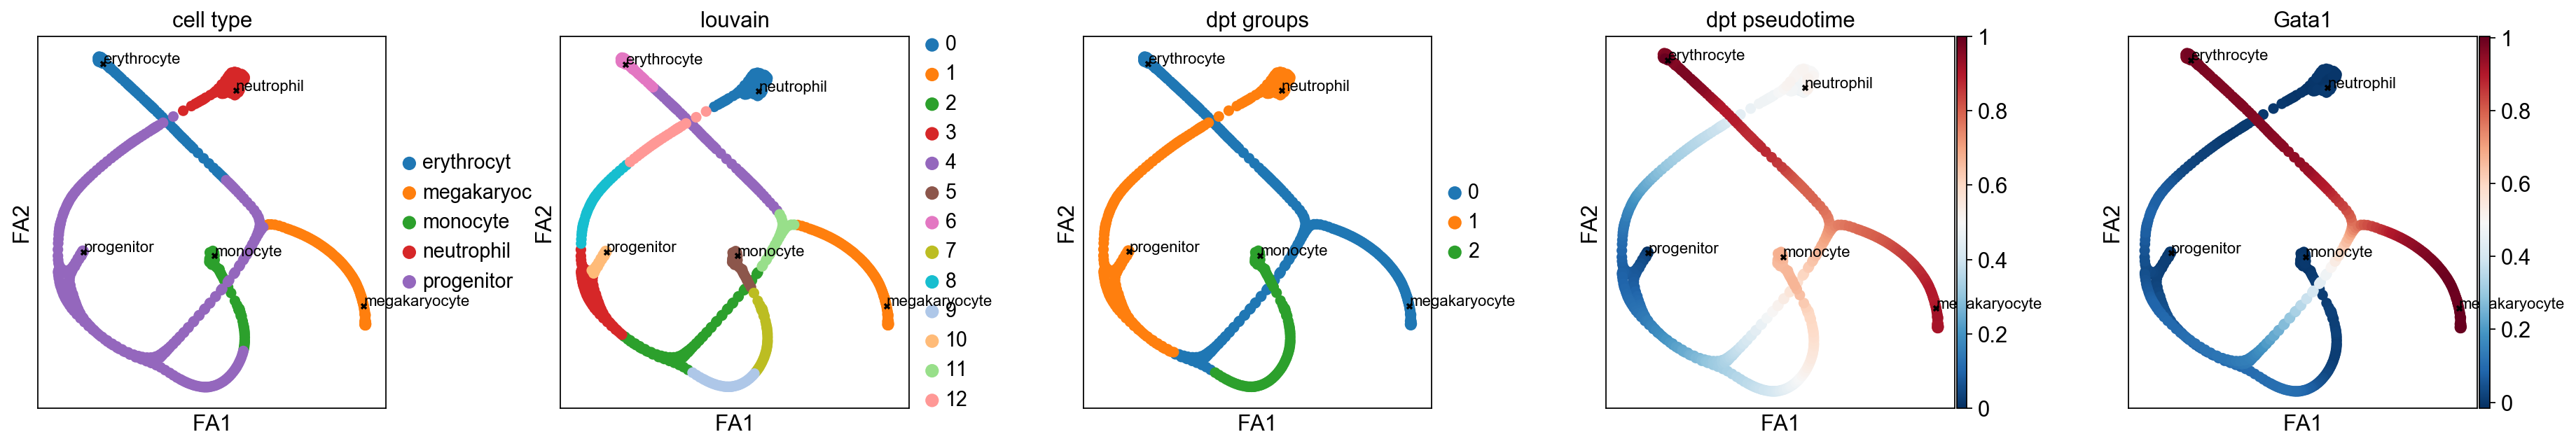

In [6]:
sc.pl.draw_graph(adata_krumsiek11, color=['cell_type', 'louvain', 'dpt_groups', 'dpt_pseudotime', 'Gata1'])

In [7]:
adata_krumsiek11.write('./write/krumsiek11.h5')

Exporting the results to a SPRING project directory.

In [8]:
adata_krumsiek11 = sc.read('./write/krumsiek11.h5')

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [9]:
sc.export_to.spring_project(adata_krumsiek11, './spring_krumsiek11')

Now, after starting a server, open
```
http://localhost:8000/SPRING/springViewer.html?../spring_kurmsiek11
```
You might need to click 'center view' and 'deselect all' to see the data.

## Example 2: 3k PBMCs data 

This starts from the standard clustering tutorial: https://github.com/theislab/scanpy_usage/tree/master/170505_seurat.

**Selecting genes**: It is recommended that - especially for large datasets - only a preselected number of genes of interest is used for SPRING, so that these genes can be found more easily (in the dataset below, searching for a certain gene in a dropdown list of ca. 13000 entries can be hard ). 

In [10]:
adata = sc.read('../170505_seurat/write/pmbc3k.h5ad')

In [11]:
sc.tl.draw_graph(adata)

drawing single-cell graph using layout "fa"
    finished (0:00:17.56) --> added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm)


Plot the groups.

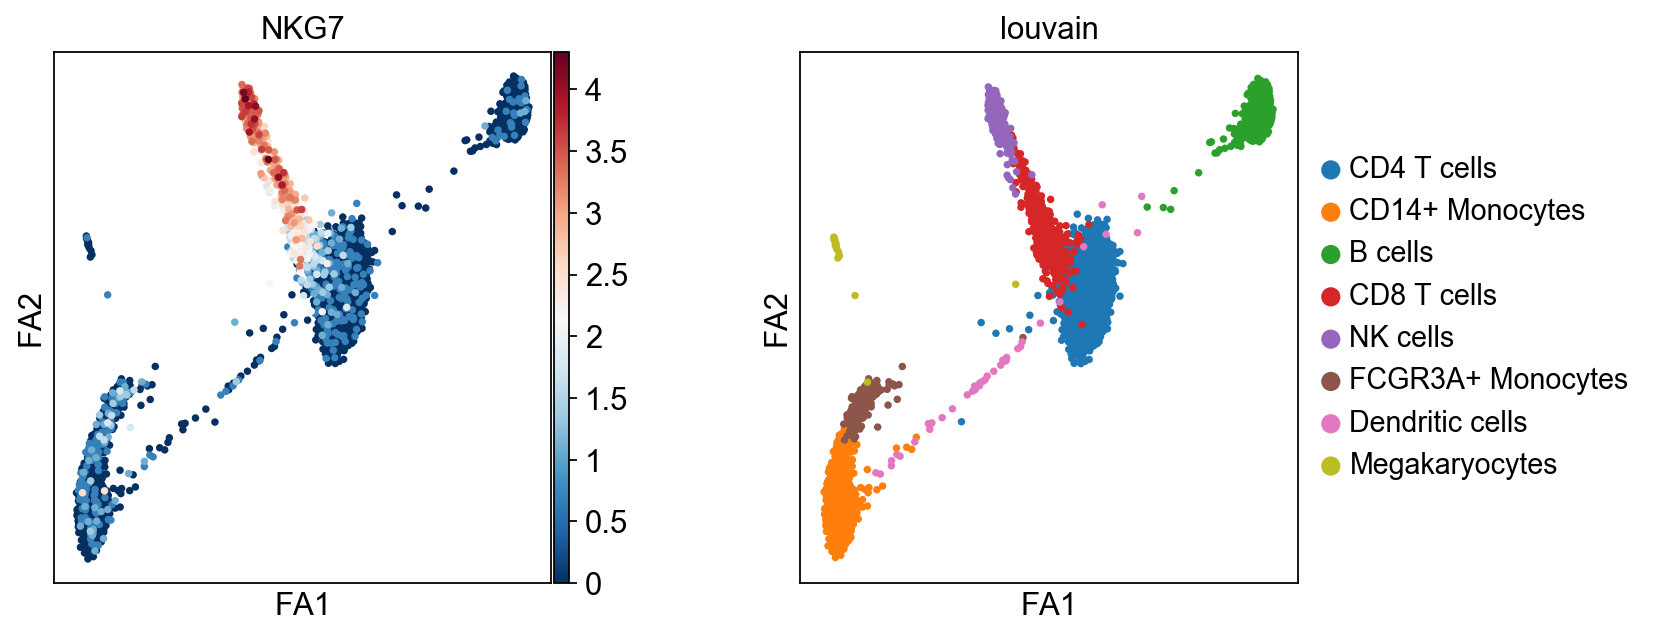

In [12]:
sc.pl.draw_graph(adata, color=['NKG7', 'louvain'])

ranking genes
    finished (0:00:00.99) --> added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids


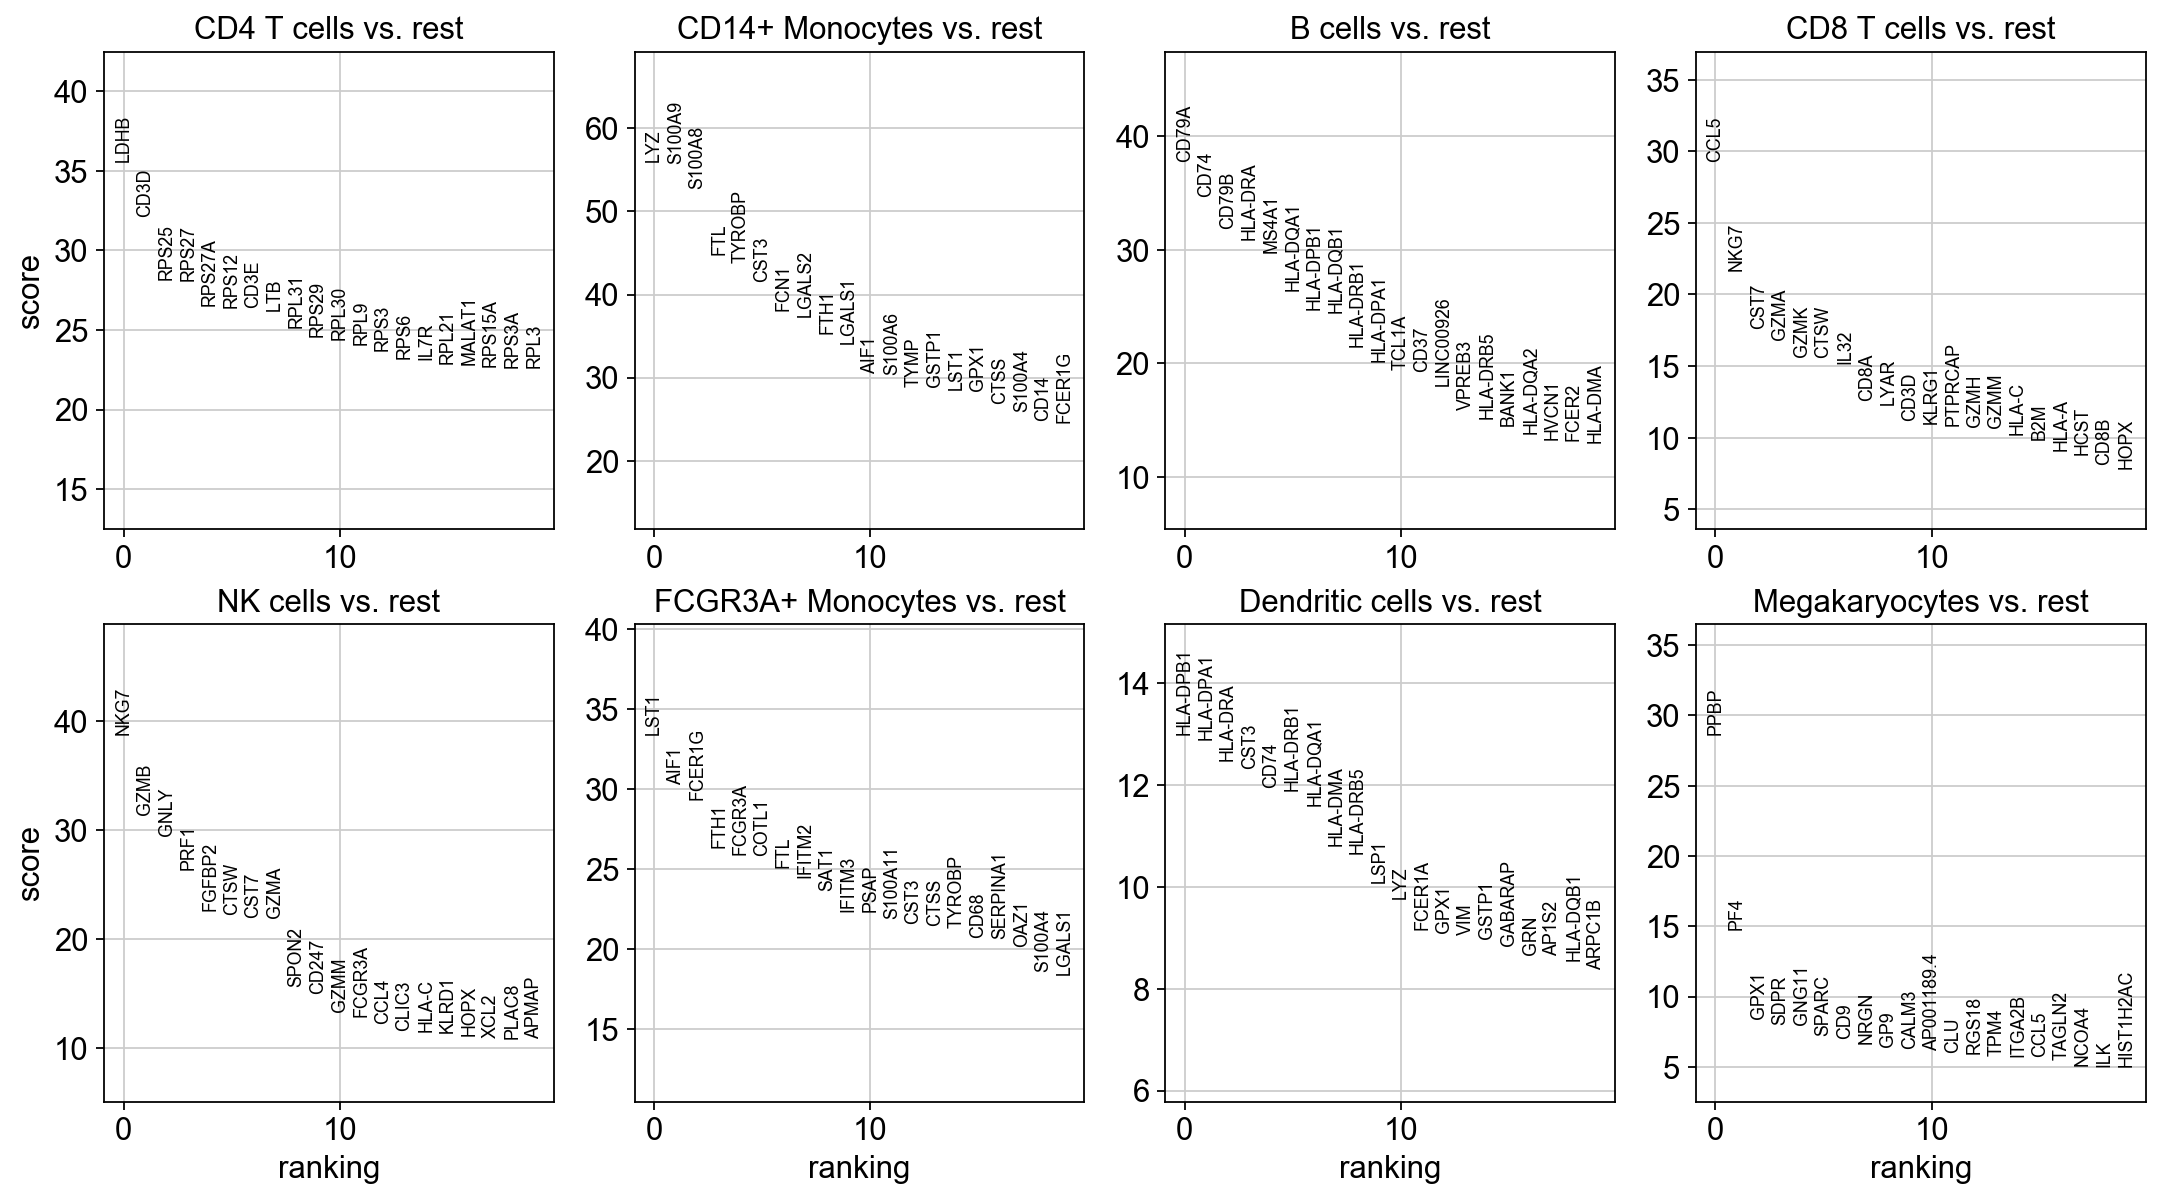

In [13]:
# Rank genes in order to include only significant ones. 
# Note that the ranking function by default ranks 100, not 20 as displayed below. 
sc.tl.rank_genes_groups(adata, 'louvain')
sc.pl.rank_genes_groups(adata, n_genes=20)

In [14]:
# export some known marker genes
known_marker_genes = ['IL7R','CD14','LYZ', 'MS4A1', 'CD8A', 'FCGR3A', 'MS4A7',
                      'GNLY', 'NKG7', 'FCER1A', 'CST3', 'PPBP']
sc.export_to.spring_project(
    adata, './spring_pbmc3k_known_markers', 
    use_genes=known_marker_genes)

In [16]:
# export the ranked genes
sc.export_to.spring_project(
    adata, './spring_pbmc3k_ranked_genes', 
    use_genes='rank_genes_groups')